In [44]:
import numpy as np
import pandas as pd
import nltk
import itertools
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv('job_skills.csv')
data.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [34]:
data = data.rename(columns = {'Minimum Qualifications':'Minimum', 'Preferred Qualifications':'Preferred'})
data.head()

,Company,Title,Category,Location,Responsibilities,Minimum,Preferred
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [35]:
data = data.dropna(how='any',axis='rows')

In [36]:
minimum = list(data['Minimum'])
minimum

['BA/BS degree or equivalent practical experience.\n3 years of experience in program and/or project management in cloud computing, enterprise software and/or marketing technologies.',
 'BS degree in an Engineering discipline or equivalent practical experience.\n7 years of experience in Cable/Connector Design or Manufacturing in an NPI role.\nExperience working with Interconnect Engineering and Product Design (PD)/Mechanical Engineer in developing, manufacturing and testing.\nAbility to speak and write in English and Mandarin fluently and idiomatically.',
 'Bachelor’s degree in Business, Economics, Statistics, Operations Research or related analytical field, or equivalent practical experience.\n2 years of work experience in business analysis.\n1 year of experience with statistical modeling, forecasting or machine learning. Experience with R, SAS or Python.\n1 year of experience developing and manipulating large datasets.',
 'BA/BS degree in Computer Science or equivalent practical exper

In [37]:
min_degree = [re.findall('BA|BS|Bachelor|MBA|PhD|Master|MA|MS', sent.split('\n')[0]) for sent in minimum]
min_degree

[['BA', 'BS'],
 ['BS'],
 ['Bachelor'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['Bachelor'],
 ['BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['Bachelor'],
 ['Bachelor'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BS'],
 ['PhD'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 [],
 ['Bachelor'],
 ['Bachelor'],
 [],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 [],
 ['BA', 'BS'],
 ['Bachelor'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 [],
 ['BA', 'BS'],
 ['Bachelor'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['Bachelor'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BS'],
 ['Bachelor'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['Bachelor'],
 ['BS'],
 ['Master'],
 ['Bachelor'],
 ['Bachelor'],
 ['BA', 'BS'],
 ['BA', 'BS'],
 ['Bachelor'],
 ['BA', 'BS'],
 ['Bachelor'],
 ['

In [38]:
for i in range(len(min_degree)):
    if len(min_degree[i]) == 2:
        min_degree[i] = ['/'.join(min_degree[i])]
    elif not len(min_degree[i]):
        min_degree[i] = ['industry experience']
min_degree = list(itertools.chain.from_iterable(min_degree))
min_degree

['BA/BS',
 'BS',
 'Bachelor',
 'BA/BS',
 'BA/BS',
 'Bachelor',
 'BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'Bachelor',
 'Bachelor',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BS',
 'PhD',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'industry experience',
 'Bachelor',
 'Bachelor',
 'industry experience',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'industry experience',
 'BA/BS',
 'Bachelor',
 'BA/BS',
 'BA/BS',
 'BS',
 'BA/BS',
 'BA/BS',
 'industry experience',
 'BA/BS',
 'Bachelor',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'Bachelor',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BS',
 'Bachelor',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'Bachelor',
 'BS',
 'Master',
 'Bachelor',
 'Bachelor',
 'BA/BS',
 'BA/BS',
 'Bachelor',
 'BA/BS',
 'Bachelor',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'BA/BS',
 'MS',
 'Bachelor',
 'BS',
 'Bachelor',
 'BA/BS',
 'PhD',
 'Bachelor',
 'Bachelor',
 'BA/BS',
 'BA/BS',
 'industry experience',
 'BA/BS',


In [39]:
freq = nltk.FreqDist(min_degree)
freq

FreqDist({'BA': 4,
          'BA/BS': 826,
          'BS': 45,
          'Bachelor': 124,
          'Bachelor/Master': 39,
          'MA': 2,
          'MBA': 42,
          'MS': 7,
          'MS/PhD': 1,
          'Master': 13,
          'Master/MBA': 28,
          'Master/PhD': 1,
          'PhD': 6,
          'industry experience': 105})

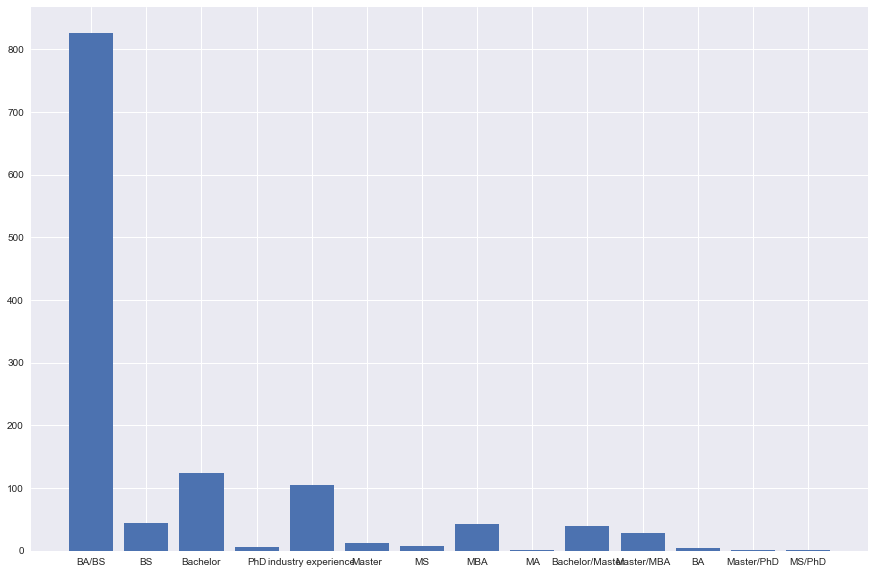

In [45]:
sns.set(rc={'figure.figsize':(15,10)})

plt.bar(range(len(freq)), list(freq.values()), align='center')
plt.xticks(range(len(freq)), list(freq.keys()))

plt.show()

In [40]:
freq_new = {}
freq_new['Bachelor level'] = freq['BA'] + freq['BA/BS'] + freq['BS'] + freq['Bachelor']
freq_new['Bachelor/Master'] = freq['Bachelor/Master']
freq_new['Master level'] = freq['MA'] + freq['MS'] + freq['Master']
freq_new['Master/PhD'] = freq['MS/PhD'] + freq['Master/PhD']
freq_new['PhD'] = freq['PhD']
freq_new['MBA'] = freq['MBA'] + freq['Master/MBA']
freq_new['industry experience'] = freq['industry experience']
freq_new

{'Bachelor level': 999,
 'Bachelor/Master': 39,
 'MBA': 70,
 'Master level': 22,
 'Master/PhD': 2,
 'PhD': 6,
 'industry experience': 105}

In [41]:
sum(freq.values()) == sum(freq_new.values())

True

"dict_keys(['Bachelor level', 'Bachelor/Master', 'Master level', 'Master/PhD', 'PhD', 'MBA', 'industry experience'])"

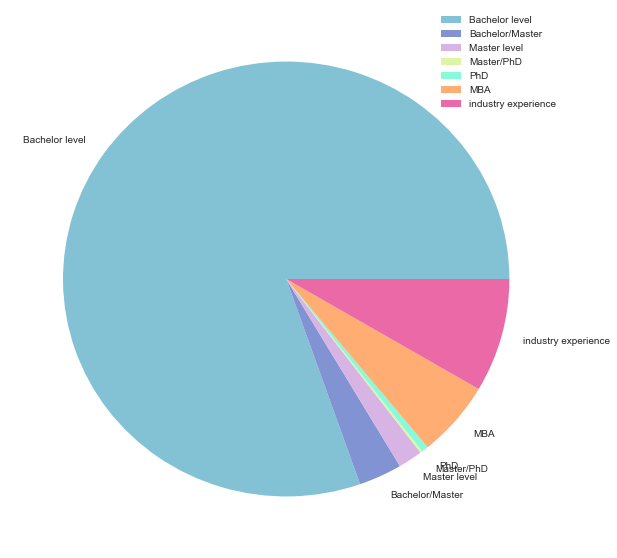

In [61]:
sns.set(rc={'figure.figsize':(10,10)})

plt.pie([float(v) for v in freq_new.values()], labels=[k for k in freq_new.keys()],
       colors=['#83c2d5', '#8293d4', '#d8b4e5', '#ddf6a5', '#87fbd9', '#FFAD73', '#EA69A6'])
plt.legend()
plt.show()